<a href="https://colab.research.google.com/github/Ragnar1999/Deep-learning/blob/master/tensorflow2ttl03_2DCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 46kB/s 
     |████████████████████████████████| 501kB 39.8MB/s 
     |████████████████████████████████| 4.3MB 42.0MB/s 


In [5]:
!pip install mlxtend==0.17.0

     |████████████████████████████████| 1.3MB 1.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 

In [0]:
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,Dropout

In [8]:
print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [0]:
from tensorflow.keras.datasets import cifar10

In [11]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
classes_name=["airplane","automobile","bird","cat","deer","dog","frog","horse","skip","truck"]

In [13]:
X_train.max()

255

In [0]:
X_train=X_train/255.0
X_test=X_test/255.0

In [21]:
X_train.shape,
X_test.shape

(10000, 32, 32, 3)

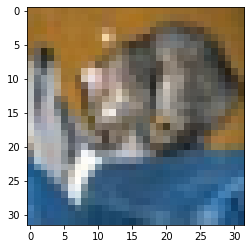

In [22]:
plt.imshow(X_test[0])

In [23]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

***Build CNN Model***

In [0]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu",input_shape=[32,32,3]))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding="valid"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [0]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["sparse_categorical_accuracy"])

In [31]:
history=model.fit(X_train,y_train,batch_size=10,epochs=10,verbose=1,validation_data=(X_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 38s 759us/sample - loss: 1.4069 - sparse_categorical_accuracy: 0.4961 - val_loss: 1.1161 - val_sparse_categorical_accuracy: 0.6023
Epoch 2/10
50000/50000 [==============================] - 33s 653us/sample - loss: 1.0972 - sparse_categorical_accuracy: 0.6117 - val_loss: 0.9840 - val_sparse_categorical_accuracy: 0.6519
Epoch 3/10
50000/50000 [==============================] - 32s 643us/sample - loss: 0.9658 - sparse_categorical_accuracy: 0.6575 - val_loss: 0.9392 - val_sparse_categorical_accuracy: 0.6731
Epoch 4/10
50000/50000 [==============================] - 32s 644us/sample - loss: 0.8750 - sparse_categorical_accuracy: 0.6912 - val_loss: 0.9116 - val_sparse_categorical_accuracy: 0.6797
Epoch 5/10
50000/50000 [==============================] - 32s 641us/sample - loss: 0.8115 - sparse_categorical_accuracy: 0.7147 - val_loss: 0.9016 - val_sparse_categorical_accuracy: 0.6832
Epoch

MODEL ACCURACY+MODEL LOSS PIC

In [0]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [0]:
y_pred=model.predict_classes(X_test)

In [34]:
y_pred

array([8, 8, 0, ..., 5, 4, 7])

In [35]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [0]:
mat=confusion_matrix(y_test,y_pred)

In [37]:
mat

array([[718,  14,  75,  15,  16,   8,   9,  14,  89,  42],
       [ 15, 772,   7,  16,   1,   4,  10,   5,  35, 135],
       [ 62,   3, 566,  72, 101,  68,  61,  38,  14,  15],
       [ 21,   7,  70, 527,  66, 164,  60,  41,  14,  30],
       [ 12,   3,  60,  89, 660,  30,  52,  75,  14,   5],
       [ 10,   4,  59, 196,  53, 567,  19,  65,   7,  20],
       [  5,   6,  42,  80,  34,  29, 773,  12,  10,   9],
       [ 14,   2,  26,  48,  41,  56,   3, 777,   5,  28],
       [ 54,  33,  22,  12,   3,   6,   4,   5, 819,  42],
       [ 23,  57,   5,   8,   1,   3,   2,  12,  23, 866]])

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb3ef2734e0>)

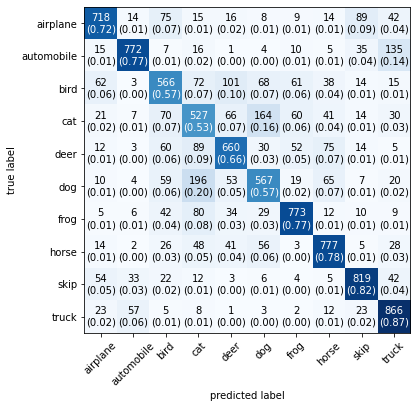

In [39]:
plot_confusion_matrix(mat,figsize=(6,6),class_names=classes_name,show_normed=True)